In [2]:
from app import db, app

In [3]:
from utils import make_response, preprocess_text, text_to_speech, addipa
import time
import pandas as pd
from models import *

In [6]:
with app.app_context():
    data = vocab.query.filter_by(vocab="floor").one()
    print(data.audio_vocab)

./audio/_.mp3


In [4]:
df = pd.read_csv(r"E:\app_english\code_test\data_vocab\data_vocab\Vocab 628d7014237441f6860b2626415e691e.csv").reset_index()
with app.app_context():
    db.create_all()
    # print(time.time() - start_time)
    # for col in columns:
    #     if col not in df.columns:
    #         return {"Status": "Please see format .csv with columns 'vocab', 'Phonetic', 'Mean', 'Example'"}, 401
    print("Start processing ")
    for i in df.index:
        start_time = time.time()
        vocab_ = preprocess_text(df.vocab[i])
        if pd.isnull(vocab_):
            continue
        try:
            existing_vocab = vocab.query.filter_by(vocab=vocab_).one()
        except :
            existing_vocab = None
        
        
        mean_ = preprocess_text(df.Mean[i])
        example_ = preprocess_text(df.Example[i])
        phonetic_vocab_ = addipa(vocab_)
        phonetic_example_ = addipa(example_)
        audio_example_ = text_to_speech(example_)
        audio_vocab_ = text_to_speech(vocab_)
        if existing_vocab == None:
            print('oke')
            data = vocab(vocab=vocab_, phonetic_vocab=phonetic_vocab_, phonetic_example=phonetic_example_, 
                            mean=mean_, example=example_,
                            audio_example= audio_example_, audio_vocab = audio_vocab_)
            db.session.add(data)
            db.session.commit() 
        else:
            print('-----------')
            phonetic_vocab_ = addipa(vocab_)
            phonetic_example_ = addipa(example_)
            existing_vocab.mean = mean_
            existing_vocab.example = example_
            existing_vocab.audio_vocab = audio_example_
            existing_vocab.audio_example = audio_vocab_
            db.session.commit() 
        print(time.time() - start_time)

Start processing 
oke
10.332634210586548
oke
4.6170430183410645
oke
6.017036437988281
oke
6.100130081176758
oke
9.047146320343018


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\pipelines\base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


oke
7.59143328666687
oke
6.224541902542114
oke
4.528897047042847
oke
2.855353593826294
oke
3.9195713996887207
oke
4.224854230880737
oke
3.240243911743164
oke
5.232609987258911
oke
4.929205894470215
oke
3.6605396270751953
oke
6.103551626205444
oke
4.671351671218872
oke
5.142564058303833
oke
7.39500880241394
oke
3.697556495666504
oke
2.634215831756592
oke
2.2986037731170654
oke
2.394470453262329
-----------
3.1554036140441895
oke
2.0985612869262695
oke
2.8976552486419678
oke
3.8309102058410645
oke
3.2054860591888428
oke
4.194932222366333
oke
2.768115758895874
oke
5.283284664154053
oke
6.392138719558716
oke
8.139522552490234
oke
2.8737194538116455
oke
4.843805313110352
oke
3.898695468902588
oke
3.3420374393463135
oke
3.16021466255188
oke
7.897517681121826
oke
3.4811818599700928
oke
2.349658250808716
oke
4.394550561904907
oke
3.6179957389831543
oke
4.0621442794799805
oke
3.3150620460510254
oke
3.502033233642578
oke
4.660276412963867
oke
6.4989173412323
oke
2.622399091720581
oke
3.117994546

In [5]:
from transformers import pipeline, set_seed

summarizer = pipeline('text2text-generation', model='describeai/gemini')



config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nguye\.cache\huggingface\hub\models--describeai--gemini. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Summarized code: This code is saying hello to the world!


In [6]:
code = "Please give me a common example with this word 'home'"

response = summarizer(code, max_length=100, num_beams=3)
print("Summarized code: " + response[0]['generated_text'])

Summarized code: This code is giving me a common example with this word 'home'.


In [2]:
!pip install pronouncing

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   -- ------------------------------------- 61.4/939.4 kB 1.1 MB/s eta 0:00:01
   --- ------------------------------------ 92.2/939.4 kB 1.7 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/939.4 kB 1.5 MB/s eta 0:00:01
   ----------- ---------------------------- 266.2/939.4 kB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 327.7/939.4 kB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 389.1/939.4 kB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 430.1/939.4 kB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 501.8/939.4 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 553.0/939.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pronouncing

word = "coding"
phonetic = pronouncing.phones_for_word(word)
if phonetic:
    print(f"Phonetic for {word}: {phonetic[0]}")
else:
    print(f"No phonetic found for {word}")


Phonetic for coding: K OW1 D IH0 NG


In [5]:
!pip install eng-to-ipa


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.8 MB 1.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/2.8 MB 1.3 MB/s eta 0:00:03
     --- ------------------------------------ 0.2/2.8 MB 1.4 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.8 MB 1.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.8 MB 1.3 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/2.8 MB 1.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/2.8 MB 1.3 MB/s eta 0:00:02
     ------- -------------------------------- 0.5/2.8 MB 1.2 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/2.8 MB 1.2 MB/s eta 0:00:02
     --------- ------------------------------ 0.7/2.8 MB 1.3 MB/s eta 0:00:02
     


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from flask import jsonify
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import re
import torch
import time
import pandas as pd
from eng_to_ipa import ipa_list
from setting import embedding_speech
def preprocess_text(text: str) -> str:    
    if pd.isnull(text):
        return " "
    text = re.sub(r"['\",\.\?:\-!]", "", text)
    text = text.strip()
    text = " ".join(text.split())
    text = text.lower()
    return text

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device=0)
# embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")


speaker_embedding = torch.tensor(embedding_speech).unsqueeze(0)


In [8]:
from datasets import load_dataset
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

FileNotFoundError: Unable to find 'hf://datasets/Matthijs/cmu-arctic-xvectors@36e87b347a6a70f0420445b02ec40c55556f9ed7/default/validation/0000.parquet' with any supported extension ['.csv', '.tsv', '.json', '.jsonl', '.parquet', '.geoparquet', '.gpq', '.arrow', '.txt', '.tar', '.blp', '.bmp', '.dib', '.bufr', '.cur', '.pcx', '.dcx', '.dds', '.ps', '.eps', '.fit', '.fits', '.fli', '.flc', '.ftc', '.ftu', '.gbr', '.gif', '.grib', '.h5', '.hdf', '.png', '.apng', '.jp2', '.j2k', '.jpc', '.jpf', '.jpx', '.j2c', '.icns', '.ico', '.im', '.iim', '.tif', '.tiff', '.jfif', '.jpe', '.jpg', '.jpeg', '.mpg', '.mpeg', '.msp', '.pcd', '.pxr', '.pbm', '.pgm', '.ppm', '.pnm', '.psd', '.bw', '.rgb', '.rgba', '.sgi', '.ras', '.tga', '.icb', '.vda', '.vst', '.webp', '.wmf', '.emf', '.xbm', '.xpm', '.BLP', '.BMP', '.DIB', '.BUFR', '.CUR', '.PCX', '.DCX', '.DDS', '.PS', '.EPS', '.FIT', '.FITS', '.FLI', '.FLC', '.FTC', '.FTU', '.GBR', '.GIF', '.GRIB', '.H5', '.HDF', '.PNG', '.APNG', '.JP2', '.J2K', '.JPC', '.JPF', '.JPX', '.J2C', '.ICNS', '.ICO', '.IM', '.IIM', '.TIF', '.TIFF', '.JFIF', '.JPE', '.JPG', '.JPEG', '.MPG', '.MPEG', '.MSP', '.PCD', '.PXR', '.PBM', '.PGM', '.PPM', '.PNM', '.PSD', '.BW', '.RGB', '.RGBA', '.SGI', '.RAS', '.TGA', '.ICB', '.VDA', '.VST', '.WEBP', '.WMF', '.EMF', '.XBM', '.XPM', '.aiff', '.au', '.avr', '.caf', '.flac', '.htk', '.svx', '.mat4', '.mat5', '.mpc2k', '.ogg', '.paf', '.pvf', '.raw', '.rf64', '.sd2', '.sds', '.ircam', '.voc', '.w64', '.wav', '.nist', '.wavex', '.wve', '.xi', '.mp3', '.opus', '.AIFF', '.AU', '.AVR', '.CAF', '.FLAC', '.HTK', '.SVX', '.MAT4', '.MAT5', '.MPC2K', '.OGG', '.PAF', '.PVF', '.RAW', '.RF64', '.SD2', '.SDS', '.IRCAM', '.VOC', '.W64', '.WAV', '.NIST', '.WAVEX', '.WVE', '.XI', '.MP3', '.OPUS', '.zip']

: 

In [ ]:
!pip install cTTS


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


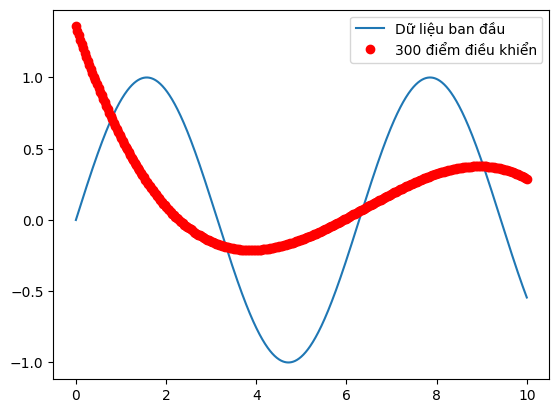

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline

# Tạo dữ liệu mẫu với 1000 điểm
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Sử dụng spline nội suy để xây dựng đường cong mượt
spline = UnivariateSpline(x, y)

# Lấy mẫu 300 điểm trên đường cong
x_sampled = np.linspace(0, 10, 300)
y_sampled = spline(x_sampled)

# Hiển thị đồ thị
import matplotlib.pyplot as plt

plt.plot(x, y, label='Dữ liệu ban đầu')
plt.plot(x_sampled, y_sampled, 'ro', label='300 điểm điều khiển')
plt.legend()
plt.show()


In [5]:
import cTTS

cTTS.synthesizeToFile("output.wav", "This is a test.")

ERROR:root:Error calling Coqui TTS server api


HTTPConnectionPool(host='localhost', port=5002): Max retries exceeded with url: /api/tts?text=This+is+a+test. (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AEDB273070>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))


False